## Bloco 03

> ### Atividade 01 - PCA

<hr>

**Informação Importante**
<br> A partir desse momento, vamos mudar um pouco da nossa estratégia. Até aqui, trabalhamos com dois datasets: 'data.csv' e 'data_artigo.csv'. O primeiro continha dados advindos de análises estatísticas iniciais. Por sua vez, o segundo era composto por dados obtidos à partir de buscas na literatura científica em comparação com a nossa base de dados. Cada um dos nossos modelos e cada uma das nossas análises foram feitas com ambos e, a partir do resultado destes, pudemos perceber que um dos datasets oferecia mais vantagem do que o outro. Em outras palavras, usar os dados do 'data_artigo.csv' nos conferiu rasultados melhores nos dois blocos anteriores. 
<br> Encontramos duas justificativas plausíveis para essas diferenças. Vejamos a seguir:
> 1. Havíamos definido no programa que um gene com maior expressão era um gene mais significantes. Todavia, essa definição poderia fazer com que perdessemos dados de muita relevância, já que elas não consideravam agentes que podem alterar tal expressão. Sob uma análise de cunho mais biológico,a taxa de expressão dos genes pode variar por diversos faotres, como a idade (que é um dos fatores que estamos estudadno) e, nesse contexto, ter um gene com baixa expressão não necessariamente significaria que ele não é significativo para a previsão. 
> 2. A segunda razão está mais vinculada à programação. Visualizamos que tanto no contexto de regressão, quanto no contexto de classificação os resultados que obtivemos a partir dos dados de artigos apresentarão maior precisão e coerência do que os resultados que envolviam o "data.csv".

**Sendo assim, a partir do presente notebook faremos uso somente do "data_artigo.csv".**

<hr>

**1. Redução de dimensionalidade**

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# nossos dados já são normalizados
# não precisamos organizar nossas features porque a ordem, no nosso caso, não faz tanta diferença

In [2]:
df_art = pd.read_csv('data_artigo.csv')
df_art = df_art.drop("Unnamed: 0",axis=1)
df_art

,Amostra,Sexo,Categoria Idade,Idade,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,GTEX-U8XE,male,Jovem,30-39,0.415301,1.959855e-02,0.609227,8.821049e-02,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,GTEX-UPJH,male,Adulto,50-59,0.000005,7.996788e-03,0.159422,3.882611e-02,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,GTEX-UPK5,male,Adulto,40-49,0.000000,7.149739e-03,0.000003,4.746163e-02,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,GTEX-V1D1,male,Adulto,50-59,0.000000,0.000000e+00,0.062979,1.321471e-06,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,GTEX-VJYA,male,Idoso,60-69,0.000000,1.969892e-02,0.329350,3.710575e-02,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,GTEX-ZYVF,female,Adulto,50-59,0.000024,1.819350e-07,0.142913,2.020577e-02,0.000032,0.095750,0.363183,0.539107,0.547407,0.106089,0.242711
106,GTEX-ZYW4,male,Idoso,60-69,0.000023,5.150542e-03,0.168872,5.422500e-02,0.000013,0.103609,0.250000,0.706623,0.785079,0.312058,0.371003
107,GTEX-ZYY3,female,Idoso,60-69,0.000003,2.070253e-07,0.071373,8.591668e-07,0.000021,0.000006,0.754844,0.472580,0.506640,0.312230,0.363262
108,GTEX-ZZ64,male,Jovem,20-29,0.000001,3.753111e-02,0.185770,2.604149e-02,0.000039,0.289014,0.354081,0.503746,0.718097,0.037088,0.377036


In [3]:
# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos - para o "data.csv"
df_art['Idade']=df_art['Idade'].replace('20-29',random.randint(20, 29))
df_art['Idade']=df_art['Idade'].replace('30-39',random.randint(30, 39))
df_art['Idade']=df_art['Idade'].replace('40-49',random.randint(40, 49))
df_art['Idade']=df_art['Idade'].replace('50-59',random.randint(50, 59))
df_art['Idade']=df_art['Idade'].replace('60-69',random.randint(60, 69))
df_art['Idade']=df_art['Idade'].replace('70-79',random.randint(70, 79))

In [4]:
df_art.head()

,Amostra,Sexo,Categoria Idade,Idade,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,GTEX-U8XE,male,Jovem,30,0.415301,0.019599,0.609227,0.088210,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,GTEX-UPJH,male,Adulto,55,0.000005,0.007997,0.159422,0.038826,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,GTEX-UPK5,male,Adulto,43,0.000000,0.007150,0.000003,0.047462,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,GTEX-V1D1,male,Adulto,55,0.000000,0.000000,0.062979,0.000001,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,GTEX-VJYA,male,Idoso,61,0.000000,0.019699,0.329350,0.037106,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728


In [5]:
df_art.tail()

,Amostra,Sexo,Categoria Idade,Idade,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
105,GTEX-ZYVF,female,Adulto,55,0.000024,1.819350e-07,0.142913,2.020577e-02,0.000032,0.095750,0.363183,0.539107,0.547407,0.106089,0.242711
106,GTEX-ZYW4,male,Idoso,61,0.000023,5.150542e-03,0.168872,5.422500e-02,0.000013,0.103609,0.250000,0.706623,0.785079,0.312058,0.371003
107,GTEX-ZYY3,female,Idoso,61,0.000003,2.070253e-07,0.071373,8.591668e-07,0.000021,0.000006,0.754844,0.472580,0.506640,0.312230,0.363262
108,GTEX-ZZ64,male,Jovem,24,0.000001,3.753111e-02,0.185770,2.604149e-02,0.000039,0.289014,0.354081,0.503746,0.718097,0.037088,0.377036
109,GTEX-ZZPU,female,Adulto,55,0.000000,1.586110e-02,0.067426,1.959858e-02,0.502779,0.581716,0.288227,0.700330,0.666243,0.043816,0.166901


Uma vez que é necessário utilizar tanto apenas os valores do dataframe quanto a variável com as colunas, criamos a variável `X` e `X_vals`

In [6]:
X = df_art.reindex(df_art.columns[4:],axis=1)
# da coluna quatro para a frente são os nossos genes e também as colunas de interesse

X_vals = X.values
X

,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,0.415301,1.959855e-02,0.609227,8.821049e-02,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,0.000005,7.996788e-03,0.159422,3.882611e-02,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,0.000000,7.149739e-03,0.000003,4.746163e-02,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,0.000000,0.000000e+00,0.062979,1.321471e-06,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,0.000000,1.969892e-02,0.329350,3.710575e-02,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728
...,...,...,...,...,...,...,...,...,...,...,...
105,0.000024,1.819350e-07,0.142913,2.020577e-02,0.000032,0.095750,0.363183,0.539107,0.547407,0.106089,0.242711
106,0.000023,5.150542e-03,0.168872,5.422500e-02,0.000013,0.103609,0.250000,0.706623,0.785079,0.312058,0.371003
107,0.000003,2.070253e-07,0.071373,8.591668e-07,0.000021,0.000006,0.754844,0.472580,0.506640,0.312230,0.363262
108,0.000001,3.753111e-02,0.185770,2.604149e-02,0.000039,0.289014,0.354081,0.503746,0.718097,0.037088,0.377036


<hr>

### PCA

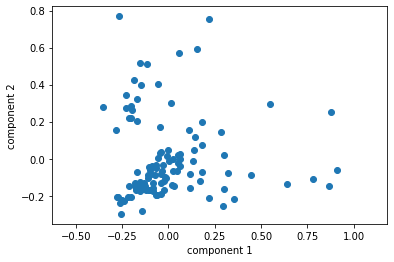

In [7]:
pca = PCA()
pca.fit(X_vals)
X_pca = pca.transform(X_vals)

X_new = pca.inverse_transform(X_pca)
#plt.scatter(X_vals[:, 0], X_vals[:, 1]) #, alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1]) #, alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');
plt.show()

# gráfico da PCA configurando duas features aleatórias
# achamos aqui as duas direções com maior variância
# direções vem na ordem, PC1 tem maior variância
# conversão linear

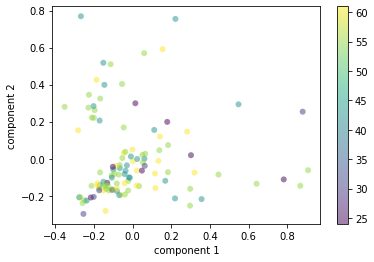

In [8]:
# vamos colorir agora o nosso gráfico de acordo com uma feature específica por nós definida
# na verdade colorimos de acordo com o nosso target

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df_art["Idade"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Gráfico considerando as duas componentes principais.

> Primeira divisão em clusters do nossos dados no Bloco 03. Vemos que temos grupos diferentes e eles estão divididos por idade. 
> <br>Vemos que se trata de dados diferentes, mas a divisão entre eles não é muito clara.
> <br>Os dados estão bem espalhados, embora pareça haver maior concetração dos verde claro (50-55 anos) no canto inferior esquerdo.
> Os dados que parecem ser mais predominantes são aqueles associados às maiores idades, de 40 para cima.

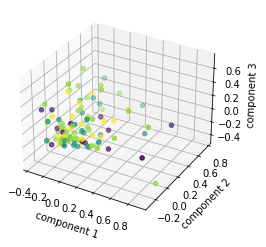

In [9]:
from mpl_toolkits import mplot3d

fig = plt.figure(facecolor = 'w')
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_art["Idade"].values)
xlabel = ax.set_xlabel('component 1')
ylabel = ax.set_ylabel('component 2')
ylabel = ax.set_zlabel('component 3')
plt.show()

Gráfico considerando as três componentes principais.

> Para o desenvovlimento desse gráfico, estamos agora utilizando três componentes. Tendo como resultado, então, um gráfico de três dimensões.
> Supostamente facilita a nossa visualização dos dados já que a divisão é "mais clara". Todavia, não parece muito melhor do que o gráfico anterior. Dessa maneira, talvez não seja tão vantajoso assim trabalhar para nós com mais uam componente.

<hr>

### ANÁLISE DA MATRIZ DE LOADINGS
> Buscando compreender o que cada componente principal considerou quanto às *features* originais

In [10]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpostas
    columns=component_names,  # colunas como componentes principais
    index=X.columns,  # as linhas são as features originais
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
MMP1,0.517847,-0.075005,0.053235,0.358118,0.376301,-0.049861,0.276928,0.054666,-0.370031,-0.108067,-0.471973
MMP3,0.126310,-0.038212,-0.163574,0.149030,0.141333,-0.052699,0.465692,-0.096126,-0.043477,-0.370607,0.738592
MMP9,0.414063,0.130311,-0.031628,-0.049427,-0.160842,0.084154,0.403642,0.277159,0.677249,0.268560,-0.068124
MMP11,0.334351,-0.059619,0.173900,0.077451,0.496967,0.289233,-0.590866,0.150093,0.205057,0.051992,0.318404
MMP24,-0.241609,0.813929,0.188199,0.483125,0.074875,0.002807,-0.006320,0.020781,0.058948,-0.025189,0.011018
MMP27,0.420934,0.529231,-0.178706,-0.558279,-0.143408,0.194835,-0.093759,-0.061160,-0.322082,-0.153988,0.024738
BARD1,-0.096603,-0.129169,0.514526,0.028664,-0.238967,0.714096,0.251358,0.123398,-0.239087,0.026531,0.071498
BCL7C,-0.210442,0.009040,0.102844,-0.238281,0.125401,-0.156495,0.021489,0.772785,0.021039,-0.492394,-0.086655
CLPTM1L,-0.025473,0.066259,0.006327,-0.076746,0.109077,-0.256646,0.110017,0.385713,-0.416434,0.700645,0.293372
TERT,0.096160,0.045244,0.749435,-0.339094,0.139192,-0.416916,0.116155,-0.304973,0.098776,-0.028511,0.042490


**Análise Inicial**
<br> Aparentemente, PC1 foi mais relevante para:
- MMP1
- MMP27
- MMP9

Por sua vez, PC2 foi mais relevante para as seguintes features:
- MMP24
- MMP27

PC3 foi então mais relevante para as seguintes features:
- TERT
- BARD1

<hr>

### ANÁLISE DAS VARIÂNCIAS
 > *Vamos antes entender o que cada uma das variâncias está nos contando:*
> <br>**Variância explicada**: mede bem basicamente o quanto dos dados são **explicados** com cada componente principal. Em outras palavras 'o quanto de sua amostra está sendo **representada** com cada componente principal'.
> <br>**Variância acumulada**: quanto de dados temos com cada uma das componentes;

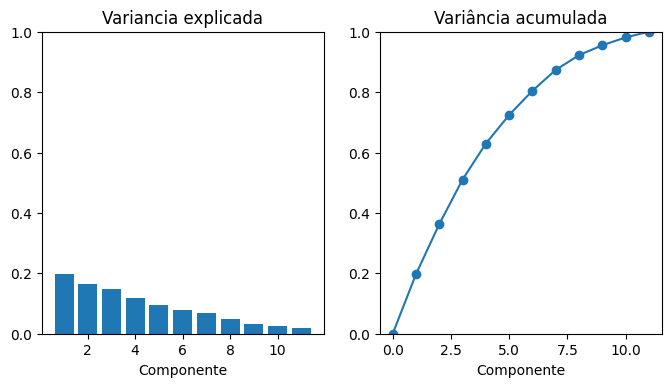

In [11]:
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)
plt.show()

**Anotações da conversa com o Dani**:
- Reduzir dimensionalidade implica na perda de dados;
- PCA nos permite avaliar até onde estamos dispostos a perder dados em prol de reduzir dimensões;
- As componentes são combinações das features;
- Fazer a redução costuma ser bom para termos previsões mais precisas, por exemplo, a depender da situação;
- Nossos dados parecem estar distribuidos entre as componentes;
- Perderíamos poucos dados se eliminássemos somente a componente 11, por exemplo;

**Conclusão**
> Talvez não seja tão vanatajoso assim reduzirmos em muitas dimensões os nossos dados. Sendo assim, aparentemente, 10 seria um bom número de componentes para nós;
> <br>Mas sabemos que também não conseguiríamos plotar em 11 dimensões;

<HR>
    

### REDUÇÃO DE DIMENSIONALIDADE PARA FEATURES

In [12]:
df_art

,Amostra,Sexo,Categoria Idade,Idade,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,GTEX-U8XE,male,Jovem,30,0.415301,1.959855e-02,0.609227,8.821049e-02,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,GTEX-UPJH,male,Adulto,55,0.000005,7.996788e-03,0.159422,3.882611e-02,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,GTEX-UPK5,male,Adulto,43,0.000000,7.149739e-03,0.000003,4.746163e-02,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,GTEX-V1D1,male,Adulto,55,0.000000,0.000000e+00,0.062979,1.321471e-06,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,GTEX-VJYA,male,Idoso,61,0.000000,1.969892e-02,0.329350,3.710575e-02,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,GTEX-ZYVF,female,Adulto,55,0.000024,1.819350e-07,0.142913,2.020577e-02,0.000032,0.095750,0.363183,0.539107,0.547407,0.106089,0.242711
106,GTEX-ZYW4,male,Idoso,61,0.000023,5.150542e-03,0.168872,5.422500e-02,0.000013,0.103609,0.250000,0.706623,0.785079,0.312058,0.371003
107,GTEX-ZYY3,female,Idoso,61,0.000003,2.070253e-07,0.071373,8.591668e-07,0.000021,0.000006,0.754844,0.472580,0.506640,0.312230,0.363262
108,GTEX-ZZ64,male,Jovem,24,0.000001,3.753111e-02,0.185770,2.604149e-02,0.000039,0.289014,0.354081,0.503746,0.718097,0.037088,0.377036


**REGRESSÃO**
<br> (para todos os algoritmos possíveis e considerando o dataset com PCA)!

In [13]:
# lendo o data frame
df_art = pd.read_csv('data_artigo.csv')
# precisamos fazer um drop pq chamamos o dataset de novo e houve a add de uma nova coluna
df_art = df_art.drop('Unnamed: 0', axis = 1)
# 1 representa vertical

# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos
df_art['Idade']=df_art['Idade'].replace('20-29',random.randint(20, 29))
df_art['Idade']=df_art['Idade'].replace('30-39',random.randint(30, 39))
df_art['Idade']=df_art['Idade'].replace('40-49',random.randint(40, 49))
df_art['Idade']=df_art['Idade'].replace('50-59',random.randint(50, 59))
df_art['Idade']=df_art['Idade'].replace('60-69',random.randint(60, 69))
df_art['Idade']=df_art['Idade'].replace('70-79',random.randint(70, 79))

# features e target
FEATURES = df_art.columns.values[4:]
TARGET = ["Idade"]
# lembrando que nossos dados já são normalizados
# logo, vamos pular a fase de normalização

X = df_art.reindex(df_art.columns[4:],axis=1)
y = df_art['Idade']  #Definindo o y como o target

print(X)
pca = PCA(n_components=3) #Calculando o PCA para três componentes
pca.fit(X)                #Ajustando o PCA
X_pca = pca.transform(X)  #Realizando o PCA

         MMP1          MMP3      MMP9         MMP11     MMP24     MMP27  \
0    0.415301  1.959855e-02  0.609227  8.821049e-02  0.000014  0.851644   
1    0.000005  7.996788e-03  0.159422  3.882611e-02  0.503206  0.168324   
2    0.000000  7.149739e-03  0.000003  4.746163e-02  0.000003  0.310585   
3    0.000000  0.000000e+00  0.062979  1.321471e-06  0.000034  0.523176   
4    0.000000  1.969892e-02  0.329350  3.710575e-02  0.444207  0.744908   
..        ...           ...       ...           ...       ...       ...   
105  0.000024  1.819350e-07  0.142913  2.020577e-02  0.000032  0.095750   
106  0.000023  5.150542e-03  0.168872  5.422500e-02  0.000013  0.103609   
107  0.000003  2.070253e-07  0.071373  8.591668e-07  0.000021  0.000006   
108  0.000001  3.753111e-02  0.185770  2.604149e-02  0.000039  0.289014   
109  0.000000  1.586110e-02  0.067426  1.959858e-02  0.502779  0.581716   

        BARD1     BCL7C   CLPTM1L      TERT    CDKN1A  
0    0.354668  0.472280  0.910613  0.456960

In [14]:
print(np.sum(pca.explained_variance_ratio_)) #Calculando a variância explicada acumulada para as três componentes principais

0.510613403287673


> Nossa variância é de 51%, não parece ser muito alta (usando como referencial para comparação a variância explicada de 98% encontrada pelos professores).

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pca,                                           #Dados das componentes principais do PCA
    y,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)                                 #Semente aleatória

In [36]:
# dataset para visualização dos dados e cálculo da correlação
df_artp_train = pd.DataFrame(X_pca,columns=['PC1', 'PC2', 'PC3']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
df_artp_train['Idade'] = y                                        #Adiciona a coluna preço, com os dados de y
print(df_artp_train.head(12))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = df_artp_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))                                          #Exibe a correlação com 4 casas decimais

         PC1       PC2       PC3  Idade
0   0.879522  0.253783  0.150340     36
1  -0.196916  0.262684  0.020482     54
2  -0.066678 -0.050566 -0.270894     45
3   0.064947  0.026960 -0.044916     54
4   0.154597  0.591225 -0.124296     61
5  -0.022768 -0.120067  0.085756     54
6   0.060785 -0.000146 -0.273812     45
7  -0.019664 -0.101292 -0.185764     45
8  -0.131899 -0.130379 -0.216412     25
9   0.301608  0.018847 -0.238916     25
10 -0.014558 -0.102317 -0.131316     45
11 -0.151400 -0.124631 -0.205794     45
          PC1     PC2     PC3   Idade
PC1    1.0000 -0.0000  0.0000 -0.0869
PC2   -0.0000  1.0000 -0.0000  0.0076
PC3    0.0000 -0.0000  1.0000  0.1692
Idade -0.0869  0.0076  0.1692  1.0000


> No notebook, os professores fazem regressão linear e calculam o RMSE. Todavia, é benéfico para nós trabalhar com nossos dados como categóricos.
> <br>Faremos regressão, mas classificação também.

In [17]:
from sklearn.neighbors import KNeighborsRegressor

modelo_knn = KNeighborsRegressor()
modelo_knn.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_verdadeiro = y_test
y_previsao = modelo_knn.predict(X_test)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) #Cálculo do RMSE

print(f"O RMSE do modelo k-NN foi de {RMSE} anos")

O RMSE do modelo k-NN foi de 12.702397769354775 anos


> Aqui, observamos um aumento no valor do RMSE (12.13) para data_art quando consideramos os resultados do bloco dois (11.66). Nesse sentido, concluímos que o nosso erro aumentou.

In [18]:
from sklearn.tree import DecisionTreeRegressor

SEMENTE_ALEATORIA = 777
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)
modelo_dt.fit(X_train, y_train)

y_verdadei = y_test
y_previs = modelo_dt.predict(X_test)

RMSE = mean_squared_error(y_verdadei, y_previs, squared=False) 

print(f"O RMSE do modelo Árvore de Decisão foi de {RMSE}")

O RMSE do modelo Árvore de Decisão foi de 13.688083735995933


> Mais um aumento. No bloco dois o RMSE para os dados de artigo para o modelo de Árvore de Decisão foi de 12.24. Considerando a técnica de PCA, o RMSE correspondeu a 13.15.

In [19]:
from sklearn.ensemble import RandomForestRegressor

SEMENTE_ALEATORIA = 777
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)
modelo_rf.fit(X_train, y_train)

y_verdadeir = y_test
y_previsa = modelo_rf.predict(X_test)

RMSE = mean_squared_error(y_verdadeir, y_previsa, squared=False) 

print(f"O RMSE do modelo Random Forest foi de {RMSE} anos")

O RMSE do modelo Random Forest foi de 12.495602862971076 anos


> Mais uma vez observamos o aumento do erro. No Bloco 02, tínhamos obtido 8.98, aqui obtivemos 11.66. O aumento do erro é um problema a medida que torna nossas previcões menos confiáveis.

<hr>

**CLASSIFICAÇÃO**

In [20]:
# lendo o data frame
# vou criar um novo df para não dar problema com a regressão
df_artc = pd.read_csv('data_artigo.csv')
# precisamos fazer um drop pq chamamos o dataset de novo e houve a add de uma nova coluna
df_artc = df_artc.drop('Unnamed: 0', axis = 1)
# 1 representa vertical

# features e target
FEATURES = df_artc.columns.values[4:]
TARGET = ["Idade"]
# lembrando que nossos dados já são normalizados
# logo, vamos pular a fase de normalização

X_2 = df_artc.reindex(df_artc.columns[4:],axis=1)
y_2 = df_artc['Idade']  #Definindo o y como o target

print(X)
pca2 = PCA(n_components=3) #Calculando o PCA para três componentes
pca2.fit(X_2)                #Ajustando o PCA
X_pca2 = pca2.transform(X_2)  #Realizando o PCA

         MMP1          MMP3      MMP9         MMP11     MMP24     MMP27  \
0    0.415301  1.959855e-02  0.609227  8.821049e-02  0.000014  0.851644   
1    0.000005  7.996788e-03  0.159422  3.882611e-02  0.503206  0.168324   
2    0.000000  7.149739e-03  0.000003  4.746163e-02  0.000003  0.310585   
3    0.000000  0.000000e+00  0.062979  1.321471e-06  0.000034  0.523176   
4    0.000000  1.969892e-02  0.329350  3.710575e-02  0.444207  0.744908   
..        ...           ...       ...           ...       ...       ...   
105  0.000024  1.819350e-07  0.142913  2.020577e-02  0.000032  0.095750   
106  0.000023  5.150542e-03  0.168872  5.422500e-02  0.000013  0.103609   
107  0.000003  2.070253e-07  0.071373  8.591668e-07  0.000021  0.000006   
108  0.000001  3.753111e-02  0.185770  2.604149e-02  0.000039  0.289014   
109  0.000000  1.586110e-02  0.067426  1.959858e-02  0.502779  0.581716   

        BARD1     BCL7C   CLPTM1L      TERT    CDKN1A  
0    0.354668  0.472280  0.910613  0.456960

In [21]:
from sklearn.model_selection import train_test_split

X_traino, X_testi, y_traino, y_testi = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pca2,                                           #Dados das componentes principais do PCA
    y_2,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)                                 #Semente aleatória

In [22]:
# dataset para visualização dos dados e cálculo da correlação
df_artcp_train = pd.DataFrame(X_pca2,columns=['PC1', 'PC2', 'PC3']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
df_artcp_train['Idade'] = y_2                                        #Adiciona a coluna preço, com os dados de y
print(df_artcp_train.head(12))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = df_artcp_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))                                          #Exibe a correlação com 4 casas decimais

# não sei porque não tá aparecendo idade embaixo da matriz com as componentes :(

         PC1       PC2       PC3  Idade
0   0.879522  0.253783  0.150340  30-39
1  -0.196916  0.262684  0.020482  50-59
2  -0.066678 -0.050566 -0.270894  40-49
3   0.064947  0.026960 -0.044916  50-59
4   0.154597  0.591225 -0.124296  60-69
5  -0.022768 -0.120067  0.085756  50-59
6   0.060785 -0.000146 -0.273812  40-49
7  -0.019664 -0.101292 -0.185764  40-49
8  -0.131899 -0.130379 -0.216412  20-29
9   0.301608  0.018847 -0.238916  20-29
10 -0.014558 -0.102317 -0.131316  40-49
11 -0.151400 -0.124631 -0.205794  40-49
     PC1  PC2  PC3
PC1  1.0 -0.0  0.0
PC2 -0.0  1.0 -0.0
PC3  0.0 -0.0  1.0


**1. k-NN com PCA**
> Todavia, sabemos que classificação é a melhor estratégia para lidar com os nossos dados. Então, vamos usar aqui.
> Relembrando que k-NN foi o método que escolhemos utilizar para a classificação realizada no Bloco 02.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# para criar e treinar o modelo
modelo_artcp_knn = KNeighborsClassifier()
modelo_artcp_knn.fit(X_traino, y_traino)

# para realizar uma previsão usando o modelo treinado
previsao_knnartc = modelo_artcp_knn.predict(X_testi)
print(previsao_knnartc)

['50-59' '50-59' '40-49' '40-49' '60-69' '50-59' '50-59' '50-59' '60-69'
 '50-59' '50-59' '40-49' '50-59' '50-59' '50-59' '40-49' '50-59' '50-59'
 '40-49' '40-49' '40-49' '50-59']


In [24]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_testi, previsao_knnartc))
print('A acurácia do método de k-NN para o dataset com PCA é, em porcentagem:', (metrics.accuracy_score(y_testi, previsao_knnartc) * 100))

print()

# precisão
print("Precision:",metrics.precision_score(y_testi, previsao_knnartc, average='weighted'))
print('A precisão da precisão em classificação para k-NN em PCA:', (metrics.precision_score(y_testi, previsao_knnartc, average='weighted') * 100))


Accuracy: 0.13636363636363635
A acurácia do método de k-NN para o dataset com PCA é, em porcentagem: 13.636363636363635

Precision: 0.08391608391608392
A precisão da precisão em classificação para k-NN em PCA: 8.391608391608392


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Percebe-se que a acurácia e a precisão com o dataset após o processo de redução de dimensionalidades caiu muito. No notebook anterior, tinhamos obtido acurácia de 82%, aproximadamente (resultado do Bloco 02), para o k-NN aplicado nos dados obtidos de artigos. Além disso, a precisão antes era de 67% e aqui passou a ser de, aproximadamente, 9%. Como aqui nos apoiamos nas três componentes principais, conseguimos perceber pelos gráficos de variância explicada e acumulada que perdemos muitos dados, o que pode explicar a nossa redução brusca de acurácia e de precisão.

**Comentário Geral**

> Acreditamos que todas as variações que foram observadas tanto no contexto da regressão, quanto da classificação se devem ao fato de termos perdido uma quantidade significativa de dados ao selecionarmos somente as três primeiras componentes. Sendo assim, a redução de dimensionalidades com PCA não parece uma estratégia vantajosa considerando a natureza dos nossos dados.

<hr>

**PCA COM 6 COMPONENTES**

**REGRESSÃO**

In [77]:
# lendo o data frame
dfart_mc = pd.read_csv('data_artigo.csv')
# precisamos fazer um drop pq chamamos o dataset de novo e houve a add de uma nova coluna
dfart_mc = dfart_mc.drop('Unnamed: 0', axis = 1)
# 1 representa vertical

# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos
dfart_mc['Idade']=dfart_mc['Idade'].replace('20-29',random.randint(20, 29))
dfart_mc['Idade']=dfart_mc['Idade'].replace('30-39',random.randint(30, 39))
dfart_mc['Idade']=dfart_mc['Idade'].replace('40-49',random.randint(40, 49))
dfart_mc['Idade']=dfart_mc['Idade'].replace('50-59',random.randint(50, 59))
dfart_mc['Idade']=dfart_mc['Idade'].replace('60-69',random.randint(60, 69))
dfart_mc['Idade']=dfart_mc['Idade'].replace('70-79',random.randint(70, 79))

# features e target
FEATURES = dfart_mc.columns.values[4:]
TARGET = ["Idade"]
# lembrando que nossos dados já são normalizados
# logo, vamos pular a fase de normalização

Xt = dfart_mc.reindex(dfart_mc.columns[4:],axis=1)
y_3 = dfart_mc['Idade']  #Definindo o y como o target

print(Xt)
pcat = PCA(n_components=6) #Calculando o PCA para seis componentes
pcat.fit(Xt)                #Ajustando o PCA
X_pcat = pcat.transform(Xt)  #Realizando o PCA

         MMP1          MMP3      MMP9         MMP11     MMP24     MMP27  \
0    0.415301  1.959855e-02  0.609227  8.821049e-02  0.000014  0.851644   
1    0.000005  7.996788e-03  0.159422  3.882611e-02  0.503206  0.168324   
2    0.000000  7.149739e-03  0.000003  4.746163e-02  0.000003  0.310585   
3    0.000000  0.000000e+00  0.062979  1.321471e-06  0.000034  0.523176   
4    0.000000  1.969892e-02  0.329350  3.710575e-02  0.444207  0.744908   
..        ...           ...       ...           ...       ...       ...   
105  0.000024  1.819350e-07  0.142913  2.020577e-02  0.000032  0.095750   
106  0.000023  5.150542e-03  0.168872  5.422500e-02  0.000013  0.103609   
107  0.000003  2.070253e-07  0.071373  8.591668e-07  0.000021  0.000006   
108  0.000001  3.753111e-02  0.185770  2.604149e-02  0.000039  0.289014   
109  0.000000  1.586110e-02  0.067426  1.959858e-02  0.502779  0.581716   

        BARD1     BCL7C   CLPTM1L      TERT    CDKN1A  
0    0.354668  0.472280  0.910613  0.456960

In [78]:
print(np.sum(pcat.explained_variance_ratio_)) #Calculando a variância explicada acumulada para as três componentes principais

0.8045363161395231


> Com um aumento do número de componentes, também observamos o aumento da variância.

In [79]:
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, y_3_train, y_3_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pcat,                                           #Dados das componentes principais do PCA
    y_3,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)                                 #Semente aleatória

In [80]:
# dataset para visualização dos dados e cálculo da correlação
dfart_mc_train = pd.DataFrame(X_pcat,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
dfart_mc_train['Idade'] = y_3                                        #Adiciona a coluna preço, com os dados de y
print(dfart_mc_train.head(12))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = dfart_mc_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))                                          #Exibe a correlação com 4 casas decimais

         PC1       PC2       PC3       PC4       PC5       PC6  Idade
0   0.879522  0.253783  0.150340 -0.183007 -0.296346 -0.186086     37
1  -0.196916  0.262684  0.020482  0.288690 -0.065944  0.118016     56
2  -0.066678 -0.050566 -0.270894 -0.037376  0.011547 -0.031981     45
3   0.064947  0.026960 -0.044916 -0.162745 -0.156258  0.185135     56
4   0.154597  0.591225 -0.124296 -0.152663 -0.011883  0.077236     63
5  -0.022768 -0.120067  0.085756 -0.019813 -0.186581  0.126382     56
6   0.060785 -0.000146 -0.273812 -0.087313 -0.002685  0.071923     45
7  -0.019664 -0.101292 -0.185764  0.035197 -0.062384  0.012823     45
8  -0.131899 -0.130379 -0.216412  0.014073  0.043201 -0.126824     20
9   0.301608  0.018847 -0.238916 -0.004403  0.062857  0.026357     20
10 -0.014558 -0.102317 -0.131316  0.015541 -0.001984 -0.054169     45
11 -0.151400 -0.124631 -0.205794  0.004873  0.062714 -0.109219     45
          PC1     PC2     PC3     PC4     PC5    PC6   Idade
PC1    1.0000 -0.0000  0.0000

> Cáluclos de RMSE para todos os algoritmos

In [82]:
from sklearn.neighbors import KNeighborsRegressor

modelo_knnt = KNeighborsRegressor()
modelo_knnt.fit(Xt_train, y_3_train)

from sklearn.metrics import mean_squared_error
y_3_verdadeiro = y_3_test
y_3_previsao = modelo_knnt.predict(Xt_test)

RMSE = mean_squared_error(y_3_verdadeiro, y_3_previsao, squared=False) #Cálculo do RMSE

print(f"O RMSE do modelo k-NN foi de {RMSE} anos")

O RMSE do modelo k-NN foi de 15.393564180585932 anos


> Aqui, observamos um aumento no valor do RMSE. Para três componentes, obtivemos 12.13; para data_art no bloco dois, 11.66; agora, com seis componentes, temos 15.39. Nesse sentido, concluímos que o nosso continua erro aumentando.

In [91]:
from sklearn.tree import DecisionTreeRegressor

SEMENTE_ALEATORIA = 777
modelo_dtt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)
modelo_dtt.fit(Xt_train, y_3_train)

y_verdadei_3 = y_3_test
y_previs_3 = modelo_dtt.predict(Xt_test)

RMSE = mean_squared_error(y_verdadei_3, y_previs_3, squared=False) 

print(f"O RMSE do modelo Árvore de Decisão foi de {RMSE}")

O RMSE do modelo Árvore de Decisão foi de 19.183326093250876


> Mais um aumento. No bloco dois o RMSE para os dados de artigo para o modelo de Árvore de Decisão foi de 12.24. Considerando a técnica de PCA, o RMSE correspondeu a 13.15 para três componentes. Para 6, aumentou para 19.18.

In [118]:
from sklearn.ensemble import RandomForestRegressor

SEMENTE_ALEATORIA = 777
modelo_rft = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)
modelo_rft.fit(Xt_train, y_3_train)

y_verdadeir_3 = y_3_test
y_previsa_3 = modelo_rft.predict(Xt_test)

RMSE = mean_squared_error(y_verdadeir_3, y_previsa_3, squared=False) 

print(f"O RMSE do modelo Random Forest foi de {RMSE} anos")

O RMSE do modelo Random Forest foi de 15.129210608500484 anos


> Mais uma vez observamos o aumento do erro. No Bloco 02, tínhamos obtido 8.98, com três componentes obtivemos 11.66. Aqui, o resultado foi 15.12. O aumento do erro é um problema a medida que torna nossas previsões menos confiáveis.

**CLASSIFICAÇÃO**

In [88]:
# lendo o data frame
# vou criar um novo df para não dar problema com a regressão e com a classificação
dfa_mc = pd.read_csv('data_artigo.csv')
# precisamos fazer um drop pq chamamos o dataset de novo e houve a add de uma nova coluna
dfa_mc = dfa_mc.drop('Unnamed: 0', axis = 1)
# 1 representa vertical

# features e target
FEATURES = dfa_mc.columns.values[4:]
TARGET = ["Idade"]
# lembrando que nossos dados já são normalizados
# logo, vamos pular a fase de normalização

X_4 = dfa_mc.reindex(dfa_mc.columns[4:],axis=1)
y_4 = dfa_mc['Idade']  #Definindo o y como o target

print(X_4)
pcaq = PCA(n_components=6) #Calculando o PCA para seis componentes
pcaq.fit(X_4)                #Ajustando o PCA
X_pcaq = pcaq.transform(X_4)  #Realizando o PCA

         MMP1          MMP3      MMP9         MMP11     MMP24     MMP27  \
0    0.415301  1.959855e-02  0.609227  8.821049e-02  0.000014  0.851644   
1    0.000005  7.996788e-03  0.159422  3.882611e-02  0.503206  0.168324   
2    0.000000  7.149739e-03  0.000003  4.746163e-02  0.000003  0.310585   
3    0.000000  0.000000e+00  0.062979  1.321471e-06  0.000034  0.523176   
4    0.000000  1.969892e-02  0.329350  3.710575e-02  0.444207  0.744908   
..        ...           ...       ...           ...       ...       ...   
105  0.000024  1.819350e-07  0.142913  2.020577e-02  0.000032  0.095750   
106  0.000023  5.150542e-03  0.168872  5.422500e-02  0.000013  0.103609   
107  0.000003  2.070253e-07  0.071373  8.591668e-07  0.000021  0.000006   
108  0.000001  3.753111e-02  0.185770  2.604149e-02  0.000039  0.289014   
109  0.000000  1.586110e-02  0.067426  1.959858e-02  0.502779  0.581716   

        BARD1     BCL7C   CLPTM1L      TERT    CDKN1A  
0    0.354668  0.472280  0.910613  0.456960

In [89]:
from sklearn.model_selection import train_test_split

Xq_train, Xq_test, y_4_train, y_4_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pcaq,                                           #Dados das componentes principais do PCA
    y_4,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)                                 #Semente aleatória

In [92]:
# dataset para visualização dos dados e cálculo da correlação
dfa_mc_train = pd.DataFrame(X_pcaq,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
dfa_mc_train['Idade'] = y_4                                        #Adiciona a coluna preço, com os dados de y
print(dfa_mc_train.head(12))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = dfa_mc_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))                                          #Exibe a correlação com 4 casas decimais

         PC1       PC2       PC3       PC4       PC5       PC6  Idade
0   0.879522  0.253783  0.150340 -0.183007 -0.296346 -0.186086  30-39
1  -0.196916  0.262684  0.020482  0.288690 -0.065944  0.118016  50-59
2  -0.066678 -0.050566 -0.270894 -0.037376  0.011547 -0.031981  40-49
3   0.064947  0.026960 -0.044916 -0.162745 -0.156258  0.185135  50-59
4   0.154597  0.591225 -0.124296 -0.152663 -0.011883  0.077236  60-69
5  -0.022768 -0.120067  0.085756 -0.019813 -0.186581  0.126382  50-59
6   0.060785 -0.000146 -0.273812 -0.087313 -0.002685  0.071923  40-49
7  -0.019664 -0.101292 -0.185764  0.035197 -0.062384  0.012823  40-49
8  -0.131899 -0.130379 -0.216412  0.014073  0.043201 -0.126824  20-29
9   0.301608  0.018847 -0.238916 -0.004403  0.062857  0.026357  20-29
10 -0.014558 -0.102317 -0.131316  0.015541 -0.001984 -0.054169  40-49
11 -0.151400 -0.124631 -0.205794  0.004873  0.062714 -0.109219  40-49
     PC1  PC2  PC3  PC4  PC5  PC6
PC1  1.0 -0.0  0.0  0.0  0.0 -0.0
PC2 -0.0  1.0 -0.0  0.

**1. k-NN com PCA**
> Relembrando que k-NN foi o método que escolhemos utilizar para a classificação realizada no Bloco 02.

In [94]:
from sklearn.neighbors import KNeighborsClassifier

# para criar e treinar o modelo
modelo_arq_knn = KNeighborsClassifier()
modelo_arq_knn.fit(Xq_train, y_4_train)

# para realizar uma previsão usando o modelo treinado
previsao_knnartq = modelo_arq_knn.predict(Xq_test)
print(previsao_knnartq)

['40-49' '40-49' '40-49' '20-29' '60-69' '50-59' '40-49' '20-29' '40-49'
 '20-29' '40-49' '40-49' '60-69' '50-59' '50-59' '50-59' '50-59' '40-49'
 '60-69' '40-49' '40-49' '50-59']


In [95]:
from sklearn import metrics
Xq_train, Xq_test, y_4_train, y_4_test

print("Accuracy:",metrics.accuracy_score(y_4_test, previsao_knnartq))
print('A acurácia do método de k-NN para o dataset com PCA é, em porcentagem:', (metrics.accuracy_score(y_4_test, previsao_knnartq) * 100))

print()

# precisão
print("Precision:",metrics.precision_score(y_4_test, previsao_knnartq, average='weighted'))
print('A precisão da precisão em classificação para k-NN em PCA:', (metrics.precision_score(y_4_test, previsao_knnartq, average='weighted') * 100))


Accuracy: 0.18181818181818182
A acurácia do método de k-NN para o dataset com PCA é, em porcentagem: 18.181818181818183

Precision: 0.1575757575757576
A precisão da precisão em classificação para k-NN em PCA: 15.75757575757576


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Percebe-se que a acurácia e a precisão com o dataset após o processo de redução de dimensionalidades caiu muito. No notebook anterior, tinhamos obtido acurácia de 82%, aproximadamente (resultado do Bloco 02), para o k-NN aplicado nos dados obtidos de artigos. Além disso, a precisão antes era de 67% e com três componentes passou a ser de, aproximadamente, 9%. Como aqui nos apoiamos nas três componentes principais, conseguimos perceber pelos gráficos de variância explicada e acumulada que perdemos muitos dados, o que pode explicar a nossa redução brusca de acurácia e de precisão. Com 6 componentes, observamos um aumento para acurária e para precisão, que, respectivamente, passaram a asusmir os valores de 18% e 16%, ainda assim, os valores são mínimos quando comparados aos bo bloco 2.

**Comentário geral - 6 componentes**

> Para 6 componentes, obtivemos:
>1. Um aumento nos valores de RMSE da regressão, o que não é positivo pois indica um aumento da chance de erro. Mas talvez isso aconteça justamente porque agora ele trabalha com mais dados;
>2. Aumento da acurária e precisão da classificação. Isso é ótimo, para a classificação o nosso modelo está mais correto e é justamente esse que entedemos como mais postivo para o nosso trabalho.

<hr>

**PCA PARA NOVE COMPONENTES**

**REGRESSÃO**

In [106]:
# lendo o data frame
dfart_nc = pd.read_csv('data_artigo.csv')
# precisamos fazer um drop pq chamamos o dataset de novo e houve a add de uma nova coluna
dfart_nc = dfart_nc.drop('Unnamed: 0', axis = 1)
# 1 representa vertical

# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos
dfart_nc['Idade']=dfart_nc['Idade'].replace('20-29',random.randint(20, 29))
dfart_nc['Idade']=dfart_nc['Idade'].replace('30-39',random.randint(30, 39))
dfart_nc['Idade']=dfart_nc['Idade'].replace('40-49',random.randint(40, 49))
dfart_nc['Idade']=dfart_nc['Idade'].replace('50-59',random.randint(50, 59))
dfart_nc['Idade']=dfart_nc['Idade'].replace('60-69',random.randint(60, 69))
dfart_nc['Idade']=dfart_nc['Idade'].replace('70-79',random.randint(70, 79))

# features e target
FEATURES = dfart_nc.columns.values[4:]
TARGET = ["Idade"]
# lembrando que nossos dados já são normalizados
# logo, vamos pular a fase de normalização

Xc = dfart_nc.reindex(dfart_mc.columns[4:],axis=1)
y_5 = dfart_mc['Idade']  #Definindo o y como o target

print(Xc)
pcac = PCA(n_components=9) #Calculando o PCA para seis componentes
pcac.fit(Xc)                #Ajustando o PCA
X_pcac = pcac.transform(Xc)  #Realizando o PCA

         MMP1          MMP3      MMP9         MMP11     MMP24     MMP27  \
0    0.415301  1.959855e-02  0.609227  8.821049e-02  0.000014  0.851644   
1    0.000005  7.996788e-03  0.159422  3.882611e-02  0.503206  0.168324   
2    0.000000  7.149739e-03  0.000003  4.746163e-02  0.000003  0.310585   
3    0.000000  0.000000e+00  0.062979  1.321471e-06  0.000034  0.523176   
4    0.000000  1.969892e-02  0.329350  3.710575e-02  0.444207  0.744908   
..        ...           ...       ...           ...       ...       ...   
105  0.000024  1.819350e-07  0.142913  2.020577e-02  0.000032  0.095750   
106  0.000023  5.150542e-03  0.168872  5.422500e-02  0.000013  0.103609   
107  0.000003  2.070253e-07  0.071373  8.591668e-07  0.000021  0.000006   
108  0.000001  3.753111e-02  0.185770  2.604149e-02  0.000039  0.289014   
109  0.000000  1.586110e-02  0.067426  1.959858e-02  0.502779  0.581716   

        BARD1     BCL7C   CLPTM1L      TERT    CDKN1A  
0    0.354668  0.472280  0.910613  0.456960

In [107]:
print(np.sum(pcac.explained_variance_ratio_)) #Calculando a variância explicada acumulada para as nove componentes principais

0.9552060494339174


> Com um aumento do número de componentes, também observamos o aumento da variância. Atingindo agora 95,5%. (Com 10 componentes, atingiriamos 98% e com 11 atingiríamos 100%).

In [108]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, y_5_train, y_5_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pcac,                                           #Dados das componentes principais do PCA
    y_5,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)                                 #Semente aleatória

In [109]:
# dataset para visualização dos dados e cálculo da correlação
dfart_nc_train = pd.DataFrame(X_pcac,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
dfart_nc_train['Idade'] = y_5                                        #Adiciona a coluna preço, com os dados de y
print(dfart_nc_train.head(12))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = dfart_nc_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))                                          #Exibe a correlação com 4 casas decimais

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.879522  0.253783  0.150340 -0.183007 -0.296346 -0.186086  0.108504   
1  -0.196916  0.262684  0.020482  0.288690 -0.065944  0.118016  0.000865   
2  -0.066678 -0.050566 -0.270894 -0.037376  0.011547 -0.031981 -0.126551   
3   0.064947  0.026960 -0.044916 -0.162745 -0.156258  0.185135 -0.045292   
4   0.154597  0.591225 -0.124296 -0.152663 -0.011883  0.077236  0.028727   
5  -0.022768 -0.120067  0.085756 -0.019813 -0.186581  0.126382  0.003642   
6   0.060785 -0.000146 -0.273812 -0.087313 -0.002685  0.071923  0.019671   
7  -0.019664 -0.101292 -0.185764  0.035197 -0.062384  0.012823  0.019468   
8  -0.131899 -0.130379 -0.216412  0.014073  0.043201 -0.126824  0.019085   
9   0.301608  0.018847 -0.238916 -0.004403  0.062857  0.026357  0.177780   
10 -0.014558 -0.102317 -0.131316  0.015541 -0.001984 -0.054169  0.082121   
11 -0.151400 -0.124631 -0.205794  0.004873  0.062714 -0.109219 -0.009353   

         PC

> Cáluclos de RMSE para todos os algoritmos

In [112]:
from sklearn.neighbors import KNeighborsRegressor

modelo_knnc = KNeighborsRegressor()
modelo_knnc.fit(Xc_train, y_5_train)

from sklearn.metrics import mean_squared_error
y_5_verdadeiro = y_5_test
y_5_previsao = modelo_knnc.predict(Xc_test)

RMSE = mean_squared_error(y_5_verdadeiro, y_5_previsao, squared=False) #Cálculo do RMSE

print(f"O RMSE do modelo k-NN foi de {RMSE} anos")

O RMSE do modelo k-NN foi de 15.69487467006637 anos


> Aqui, observamos um aumento no valor do RMSE. Para três componentes, obtivemos 12.13; para data_art no bloco dois, 11.66; agora, com seis componentes, temos 15.39. Com nove componentes, concluímos que o nosso erro segue aumentando.

In [113]:
from sklearn.tree import DecisionTreeRegressor
Xc_train, Xc_test, y_5_train, y_5_test

SEMENTE_ALEATORIA = 777
modelo_dtc = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)
modelo_dtc.fit(Xc_train, y_5_train)

y_verdadei_5 = y_5_test
y_previs_5 = modelo_dtc.predict(Xc_test)

RMSE = mean_squared_error(y_verdadei_5, y_previs_5, squared=False) 

print(f"O RMSE do modelo Árvore de Decisão foi de {RMSE}")

O RMSE do modelo Árvore de Decisão foi de 20.322401432901575


> Mais um aumento. No bloco dois o RMSE para os dados de artigo para o modelo de Árvore de Decisão foi de 12.24. Considerando a técnica de PCA, o RMSE correspondeu a 13.15 para três componentes. Para 6, aumentou para 19.18. Para 9, aumentou para 20.32.

In [117]:
from sklearn.ensemble import RandomForestRegressor
Xc_train, Xc_test, y_5_train, y_5_test

SEMENTE_ALEATORIA = 777
modelo_rfc = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)
modelo_rfc.fit(Xc_train, y_5_train)

y_verdadeir_5 = y_5_test
y_previsa_5 = modelo_rfc.predict(Xc_test)

RMSE = mean_squared_error(y_verdadeir_5, y_previsa_5, squared=False) 

print(f"O RMSE do modelo Random Forest foi de {RMSE} anos")

O RMSE do modelo Random Forest foi de 15.030092088268061 anos


> Pela primeira vez, observamos uma queda!. No Bloco 02, tínhamos obtido 8.98, com três componentes obtivemos 11.66. Aqui, o resultado foi 15.12. Para 9 componentes, 15.03. A diminuição do erro é uma vantagem a medida que torna nossas previsões mais confiáveis. Assim, dentre os modelos de regressão, a floresta aleatória foi o melhor.

**CLASSIFICAÇÃO**

In [119]:
# lendo o data frame
# vou criar um novo df para não dar problema com a regressão e com a classificação
dfa_ncc = pd.read_csv('data_artigo.csv')
# precisamos fazer um drop pq chamamos o dataset de novo e houve a add de uma nova coluna
dfa_ncc = dfa_ncc.drop('Unnamed: 0', axis = 1)
# 1 representa vertical

# features e target
FEATURES = dfa_ncc.columns.values[4:]
TARGET = ["Idade"]
# lembrando que nossos dados já são normalizados
# logo, vamos pular a fase de normalização

Xc_5 = dfa_ncc.reindex(dfa_ncc.columns[4:],axis=1)
yc_5 = dfa_ncc['Idade']  #Definindo o y como o target

print(Xc_5)
pcacc = PCA(n_components=9) #Calculando o PCA para seis componentes
pcacc.fit(Xc_5)                #Ajustando o PCA
X_pcacc = pcacc.transform(Xc_5)  #Realizando o PCA

         MMP1          MMP3      MMP9         MMP11     MMP24     MMP27  \
0    0.415301  1.959855e-02  0.609227  8.821049e-02  0.000014  0.851644   
1    0.000005  7.996788e-03  0.159422  3.882611e-02  0.503206  0.168324   
2    0.000000  7.149739e-03  0.000003  4.746163e-02  0.000003  0.310585   
3    0.000000  0.000000e+00  0.062979  1.321471e-06  0.000034  0.523176   
4    0.000000  1.969892e-02  0.329350  3.710575e-02  0.444207  0.744908   
..        ...           ...       ...           ...       ...       ...   
105  0.000024  1.819350e-07  0.142913  2.020577e-02  0.000032  0.095750   
106  0.000023  5.150542e-03  0.168872  5.422500e-02  0.000013  0.103609   
107  0.000003  2.070253e-07  0.071373  8.591668e-07  0.000021  0.000006   
108  0.000001  3.753111e-02  0.185770  2.604149e-02  0.000039  0.289014   
109  0.000000  1.586110e-02  0.067426  1.959858e-02  0.502779  0.581716   

        BARD1     BCL7C   CLPTM1L      TERT    CDKN1A  
0    0.354668  0.472280  0.910613  0.456960

In [123]:
from sklearn.model_selection import train_test_split

Xcc_train, Xcc_test, yc_5_train, yc_5_test = train_test_split( #Chamando a função train_test_split, atribuindo os valores nas variáveis a esquerda da igualdade
    X_pcacc,                                           #Dados das componentes principais do PCA
    yc_5,                                               #Dados do target
    test_size=0.2,                                   #Tamanho do conjunto de teste
    random_state=42)                                 #Semente aleatória

In [124]:
# dataset para visualização dos dados e cálculo da correlação
dfa_ncc_train = pd.DataFrame(X_pcacc,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']) #Define as colunas das PC em um dataframe, utilizando os dados do X_pca
dfa_ncc_train['Idade'] = yc_5                                       #Adiciona a coluna preço, com os dados de y
print(dfa_ncc_train.head(12))                                     #Exibe as 10 primeiras linhas do dataset
corrmat = dfa_ncc_train.corr()                                    #Cálculo da correlação
print(round(corrmat,4))                                          #Exibe a correlação com 4 casas decimais

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.879522  0.253783  0.150340 -0.183007 -0.296346 -0.186086  0.108504   
1  -0.196916  0.262684  0.020482  0.288690 -0.065944  0.118016  0.000865   
2  -0.066678 -0.050566 -0.270894 -0.037376  0.011547 -0.031981 -0.126551   
3   0.064947  0.026960 -0.044916 -0.162745 -0.156258  0.185135 -0.045292   
4   0.154597  0.591225 -0.124296 -0.152663 -0.011883  0.077236  0.028727   
5  -0.022768 -0.120067  0.085756 -0.019813 -0.186581  0.126382  0.003642   
6   0.060785 -0.000146 -0.273812 -0.087313 -0.002685  0.071923  0.019671   
7  -0.019664 -0.101292 -0.185764  0.035197 -0.062384  0.012823  0.019468   
8  -0.131899 -0.130379 -0.216412  0.014073  0.043201 -0.126824  0.019085   
9   0.301608  0.018847 -0.238916 -0.004403  0.062857  0.026357  0.177780   
10 -0.014558 -0.102317 -0.131316  0.015541 -0.001984 -0.054169  0.082121   
11 -0.151400 -0.124631 -0.205794  0.004873  0.062714 -0.109219 -0.009353   

         PC

**1. k-NN com PCA**
> Relembrando que k-NN foi o método que escolhemos utilizar para a classificação realizada no Bloco 02.

In [128]:
from sklearn.neighbors import KNeighborsClassifier

# para criar e treinar o modelo
modelo_c_knn = KNeighborsClassifier()
modelo_c_knn.fit(Xcc_train, yc_5_train)

# para realizar uma previsão usando o modelo treinado
previsao_c_knn = modelo_c_knn.predict(Xcc_test)
print(previsao_c_knn)

['40-49' '40-49' '50-59' '40-49' '60-69' '50-59' '50-59' '20-29' '50-59'
 '40-49' '50-59' '40-49' '60-69' '20-29' '50-59' '50-59' '40-49' '50-59'
 '60-69' '40-49' '40-49' '50-59']


In [130]:
from sklearn import metrics
Xq_train, Xq_test, y_4_train, y_4_test

print("Accuracy:",metrics.accuracy_score(yc_5_test, previsao_c_knn))
print('A acurácia do método de k-NN para o dataset com PCA é, em porcentagem:', (metrics.accuracy_score(y_4_test, previsao_c_knn) * 100))

print()

# precisão
print("Precision:",metrics.precision_score(yc_5_test, previsao_c_knn, average='weighted'))
print('A precisão da precisão em classificação para k-NN em PCA:', (metrics.precision_score(yc_5_test, previsao_c_knn, average='weighted') * 100))


Accuracy: 0.2727272727272727
A acurácia do método de k-NN para o dataset com PCA é, em porcentagem: 27.27272727272727

Precision: 0.18939393939393936
A precisão da precisão em classificação para k-NN em PCA: 18.939393939393938


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Percebe-se que a acurácia e a precisão com o dataset após o processo de redução de dimensionalidades caiu muito. No notebook anterior, tinhamos obtido acurácia de 82%, aproximadamente (resultado do Bloco 02), para o k-NN aplicado nos dados obtidos de artigos. Além disso, a precisão antes era de 67% e com três componentes passou a ser de, aproximadamente, 9%. Como aqui nos apoiamos nas três componentes principais, conseguimos perceber pelos gráficos de variância explicada e acumulada que perdemos muitos dados, o que pode explicar a nossa redução brusca de acurácia e de precisão. Com 6 componentes, observamos um aumento para acurária e para precisão, que, respectivamente, passaram a asusmir os valores de 18% e 16%, ainda assim, os valores são mínimos quando comparados aos bo bloco 2. Com 9 componentes, acompanhamos mais um aumento, 27% de acurácia e 19% de precisão.

**Comentário geral - 9 componentes**

> Para 9 componentes, obtivemos:
>1. Um aumento nos valores de RMSE da regressão, o que não é positivo pois indica um aumento da chance de erro. Mas talvez isso aconteça justamente porque agora ele trabalha com mais dados. Todavia, obtivemos também uma diminuição do RMSE para floresta de decisão;
>2. Aumento da acurária e precisão da classificação. Isso é ótimo, para a classificação o nosso modelo está mais correto e é justamente esse que entedemos como mais postivo para o nosso trabalho. Quanto mais componentes, mais dados temos.